# Regressão Linear Multivariada - Trabalho

## Estudo de caso: Qualidade de Vinhos

Nesta trabalho, treinaremos um modelo de regressão linear usando descendência de gradiente estocástico no conjunto de dados da Qualidade do Vinho. O exemplo pressupõe que uma cópia CSV do conjunto de dados está no diretório de trabalho atual com o nome do arquivo *winequality-white.csv*.

O conjunto de dados de qualidade do vinho envolve a previsão da qualidade dos vinhos brancos em uma escala, com medidas químicas de cada vinho. É um problema de classificação multiclasse, mas também pode ser enquadrado como um problema de regressão. O número de observações para cada classe não é equilibrado. Existem 4.898 observações com 11 variáveis de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Fixed acidity.
2. Volatile acidity.
3. Citric acid.
4. Residual sugar.
5. Chlorides.
6. Free sulfur dioxide. 
7. Total sulfur dioxide. 
8. Density.
9. pH.
10. Sulphates.
11. Alcohol.
12. Quality (score between 0 and 10).

O desempenho de referencia de predição do valor médio é um RMSE de aproximadamente 0.148 pontos de qualidade.

Utilize o exemplo apresentado no tutorial e altere-o de forma a carregar os dados e analisar a acurácia de sua solução. 


In [154]:
import csv
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

def coefficients_sgd(train, l_rate, n_epoch):
    size = train.shape[0]
    coef = np.random.normal(size=train.shape[1]-1)
    print ('Coeficiente Inicial=',(coef))
    errors = []
    
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train.values:
            x = row[0:-1]
            yhat = np.dot(x, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef = coef - l_rate * error * x
        rmse = np.sqrt(sum_error/size) 
        errors.append(rmse)
        print(('epoch=%d, lrate=%.3f, RMSE=%.3f' % (epoch, l_rate, rmse)))
    return coef, errors



In [155]:
dataset = pd.read_csv('winequality-white.csv', delimiter=";")

cols = list(dataset.columns)
cols.remove('quality')

datasetNorm = pd.DataFrame(preprocessing.scale(dataset[cols]))
datasetNorm['y'] = dataset['quality']

idx = 0
new_col = np.ones(datasetNorm.shape[0])  # can be a list, a Series, an array or a scalar   
datasetNorm.insert(loc=idx, column='B0', value=new_col)

print(datasetNorm.shape)

train, test = train_test_split(datasetNorm, test_size=0.3)

(4898, 13)


In [168]:
# Calculate coefficients
l_rate = 1e-5
n_epoch = 200
coefs, errors = coefficients_sgd(train, l_rate, n_epoch)
print('Coeficiente Final=',coefs)

Coeficiente Inicial= [-0.45111468  2.23254304 -1.48777801  0.262857   -0.35499591 -0.03776972
  1.26994076 -1.44760054 -0.02891993 -0.30925472 -0.28220391  1.83270609]
epoch=0, lrate=0.000, RMSE=7.146
epoch=1, lrate=0.000, RMSE=6.884
epoch=2, lrate=0.000, RMSE=6.635
epoch=3, lrate=0.000, RMSE=6.398
epoch=4, lrate=0.000, RMSE=6.171
epoch=5, lrate=0.000, RMSE=5.954
epoch=6, lrate=0.000, RMSE=5.747
epoch=7, lrate=0.000, RMSE=5.549
epoch=8, lrate=0.000, RMSE=5.359
epoch=9, lrate=0.000, RMSE=5.177
epoch=10, lrate=0.000, RMSE=5.002
epoch=11, lrate=0.000, RMSE=4.835
epoch=12, lrate=0.000, RMSE=4.674
epoch=13, lrate=0.000, RMSE=4.520
epoch=14, lrate=0.000, RMSE=4.371
epoch=15, lrate=0.000, RMSE=4.229
epoch=16, lrate=0.000, RMSE=4.092
epoch=17, lrate=0.000, RMSE=3.961
epoch=18, lrate=0.000, RMSE=3.835
epoch=19, lrate=0.000, RMSE=3.713
epoch=20, lrate=0.000, RMSE=3.597
epoch=21, lrate=0.000, RMSE=3.484
epoch=22, lrate=0.000, RMSE=3.376
epoch=23, lrate=0.000, RMSE=3.273
epoch=24, lrate=0.000, RMS

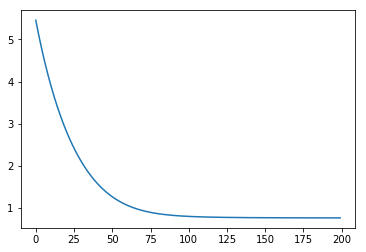

In [167]:
#Gráfico de Custo por Época
plt.plot(errors)
plt.show()